In [1]:
import numpy as np
import pandas as pd
import os
from shutil import copyfile
import pickle
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import colorlover as cl


import neuro_morpho_toolbox as nmt
%matplotlib inline
import pickle
pickle_in = open("/home/penglab/FeaCal/all_ns.pickle","rb")
[ns] = pickle.load(pickle_in)


/home/penglab/anaconda3/lib/python3.7/site-packages/neuro_morpho_toolbox-0.1-py3.7.egg/neuro_morpho_toolbox/
Loading CCF Atlas data...
Loading time: 0.98
Loading CCF brain structure data...
Loading time: 0.01


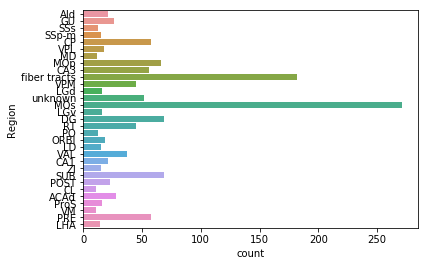

In [2]:
sf = ns.features['soma_features'].region
ct = sf["Region"].value_counts().sort_values(ascending=False)
_ = sns.countplot(y="Region", 
                  data=sf.loc[sf.Region.isin(ct.index[ct>10])],
                 )

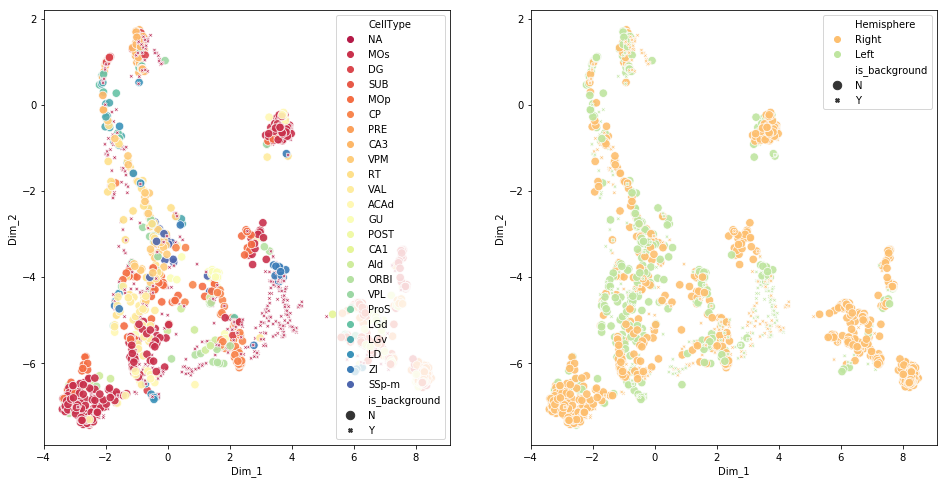

In [3]:
_ = ns.ReduceDimUMAP(feature_set="projection_features", n_neighbors=100)
_ = ns.FeatureScatter(["CellType", "Hemisphere"], map="UMAP")

### Speed of parallel
* for an array testA = nmt.annotation.array[55:90,120:167,179:231].copy()
    * There are 85540 points inside
    * Takes 29.143057346343994 second to run the code.
* For the original array
    * There are 77045760 points inside
    * It may take about 7.25 hours to store all the point. We will try that this evening.

In [29]:
x_block = [range(nmt.annotation.array.shape[0])[i:i + 30] for i in range(0, nmt.annotation.array.shape[0], 30)]
y_block = [range(nmt.annotation.array.shape[1])[i:i + 30] for i in range(0, nmt.annotation.array.shape[1], 30)]
z_block = [range(nmt.annotation.array.shape[2])[i:i + 30] for i in range(0, nmt.annotation.array.shape[2], 30)]

In [32]:
import multiprocessing
import time
def Contour_block(Temp_arr):
    co_1,co_2,co_3 = np.where(Temp_arr != 0) 
    block_list=[]
    for iter_COR in range(len(co_1)):
        x_in = co_1[iter_COR]
        y_in = co_2[iter_COR]
        z_in = co_3[iter_COR]
        centerV =  Temp_arr[x_in,y_in, z_in]  
        x1 = Temp_arr[max(0,x_in-1),y_in,z_in]            # -1,0,0
        x2 = Temp_arr[min(Temp_arr.shape[0]-1,x_in+1),y_in,z_in]#+1,0,0
        y1 = Temp_arr[x_in,max(0,y_in-1),z_in]# 0,-1,0
        y2 = Temp_arr[x_in,min(Temp_arr.shape[1]-1,y_in+1),z_in] # 0,+1,0
        z1 = Temp_arr[x_in,y_in,max(0,z_in-1)]# 0,0,-1
        z2 = Temp_arr[x_in,y_in,min(Temp_arr.shape[2]-1,z_in+1)]# 0,0,+1
        if not all(v == centerV for v in [x1,x2,y1,y2,z1,z2]):
            block_list.append([x_in,y_in,z_in])
    return (block_list)


corenum = 5
ContourDic = {}

start = time.perf_counter ()
start=time.time()


result_list=[]   
for iter_X in x_block:
    for iter_Y in y_block:
        for iter_Z in z_block:
            temp_array = nmt.annotation.array[iter_X[0]:iter_X[-1]+1,iter_Y[0]:iter_Y[-1]+1,iter_Z[0]:iter_Z[-1]+1].copy()
            result_list.append(Contour_block(temp_array))
            print('X range: '+str(iter_X[0])+':'+ str(iter_X[-1]+1)+'; Y range: '+str(iter_Y[0])+':'+ str(iter_Y[-1]+1)+'; Z range: '+str(iter_Z[0])+':'+ str(iter_Z[-1]+1))
print('Have finished the checking part')

elapsed = (time.time() - start)
print('Time needed to run the whole matrix is '+ str(elapsed))
#ContourDic['ALL']= ([xx for xx in  result_list])

X range: 0:30; Y range: 0:30; Z range: 0:30
X range: 0:30; Y range: 0:30; Z range: 30:60
X range: 0:30; Y range: 0:30; Z range: 60:90
X range: 0:30; Y range: 0:30; Z range: 90:120
X range: 0:30; Y range: 0:30; Z range: 120:150
X range: 0:30; Y range: 0:30; Z range: 150:180
X range: 0:30; Y range: 0:30; Z range: 180:210
X range: 0:30; Y range: 0:30; Z range: 210:240
X range: 0:30; Y range: 0:30; Z range: 240:270
X range: 0:30; Y range: 0:30; Z range: 270:300
X range: 0:30; Y range: 0:30; Z range: 300:330
X range: 0:30; Y range: 0:30; Z range: 330:360
X range: 0:30; Y range: 0:30; Z range: 360:390
X range: 0:30; Y range: 0:30; Z range: 390:420
X range: 0:30; Y range: 0:30; Z range: 420:450
X range: 0:30; Y range: 0:30; Z range: 450:456
X range: 0:30; Y range: 30:60; Z range: 0:30
X range: 0:30; Y range: 30:60; Z range: 30:60
X range: 0:30; Y range: 30:60; Z range: 60:90
X range: 0:30; Y range: 30:60; Z range: 90:120
X range: 0:30; Y range: 30:60; Z range: 120:150
X range: 0:30; Y range: 

X range: 30:60; Y range: 90:120; Z range: 180:210
X range: 30:60; Y range: 90:120; Z range: 210:240
X range: 30:60; Y range: 90:120; Z range: 240:270
X range: 30:60; Y range: 90:120; Z range: 270:300
X range: 30:60; Y range: 90:120; Z range: 300:330
X range: 30:60; Y range: 90:120; Z range: 330:360
X range: 30:60; Y range: 90:120; Z range: 360:390
X range: 30:60; Y range: 90:120; Z range: 390:420
X range: 30:60; Y range: 90:120; Z range: 420:450
X range: 30:60; Y range: 90:120; Z range: 450:456
X range: 30:60; Y range: 120:150; Z range: 0:30
X range: 30:60; Y range: 120:150; Z range: 30:60
X range: 30:60; Y range: 120:150; Z range: 60:90
X range: 30:60; Y range: 120:150; Z range: 90:120
X range: 30:60; Y range: 120:150; Z range: 120:150
X range: 30:60; Y range: 120:150; Z range: 150:180
X range: 30:60; Y range: 120:150; Z range: 180:210
X range: 30:60; Y range: 120:150; Z range: 210:240
X range: 30:60; Y range: 120:150; Z range: 240:270
X range: 30:60; Y range: 120:150; Z range: 270:30

X range: 60:90; Y range: 90:120; Z range: 180:210
X range: 60:90; Y range: 90:120; Z range: 210:240
X range: 60:90; Y range: 90:120; Z range: 240:270
X range: 60:90; Y range: 90:120; Z range: 270:300
X range: 60:90; Y range: 90:120; Z range: 300:330
X range: 60:90; Y range: 90:120; Z range: 330:360
X range: 60:90; Y range: 90:120; Z range: 360:390
X range: 60:90; Y range: 90:120; Z range: 390:420
X range: 60:90; Y range: 90:120; Z range: 420:450
X range: 60:90; Y range: 90:120; Z range: 450:456
X range: 60:90; Y range: 120:150; Z range: 0:30
X range: 60:90; Y range: 120:150; Z range: 30:60
X range: 60:90; Y range: 120:150; Z range: 60:90
X range: 60:90; Y range: 120:150; Z range: 90:120
X range: 60:90; Y range: 120:150; Z range: 120:150
X range: 60:90; Y range: 120:150; Z range: 150:180
X range: 60:90; Y range: 120:150; Z range: 180:210
X range: 60:90; Y range: 120:150; Z range: 210:240
X range: 60:90; Y range: 120:150; Z range: 240:270
X range: 60:90; Y range: 120:150; Z range: 270:30

X range: 90:120; Y range: 90:120; Z range: 120:150
X range: 90:120; Y range: 90:120; Z range: 150:180
X range: 90:120; Y range: 90:120; Z range: 180:210
X range: 90:120; Y range: 90:120; Z range: 210:240
X range: 90:120; Y range: 90:120; Z range: 240:270
X range: 90:120; Y range: 90:120; Z range: 270:300
X range: 90:120; Y range: 90:120; Z range: 300:330
X range: 90:120; Y range: 90:120; Z range: 330:360
X range: 90:120; Y range: 90:120; Z range: 360:390
X range: 90:120; Y range: 90:120; Z range: 390:420
X range: 90:120; Y range: 90:120; Z range: 420:450
X range: 90:120; Y range: 90:120; Z range: 450:456
X range: 90:120; Y range: 120:150; Z range: 0:30
X range: 90:120; Y range: 120:150; Z range: 30:60
X range: 90:120; Y range: 120:150; Z range: 60:90
X range: 90:120; Y range: 120:150; Z range: 90:120
X range: 90:120; Y range: 120:150; Z range: 120:150
X range: 90:120; Y range: 120:150; Z range: 150:180
X range: 90:120; Y range: 120:150; Z range: 180:210
X range: 90:120; Y range: 120:15

X range: 120:150; Y range: 60:90; Z range: 180:210
X range: 120:150; Y range: 60:90; Z range: 210:240
X range: 120:150; Y range: 60:90; Z range: 240:270
X range: 120:150; Y range: 60:90; Z range: 270:300
X range: 120:150; Y range: 60:90; Z range: 300:330
X range: 120:150; Y range: 60:90; Z range: 330:360
X range: 120:150; Y range: 60:90; Z range: 360:390
X range: 120:150; Y range: 60:90; Z range: 390:420
X range: 120:150; Y range: 60:90; Z range: 420:450
X range: 120:150; Y range: 60:90; Z range: 450:456
X range: 120:150; Y range: 90:120; Z range: 0:30
X range: 120:150; Y range: 90:120; Z range: 30:60
X range: 120:150; Y range: 90:120; Z range: 60:90
X range: 120:150; Y range: 90:120; Z range: 90:120
X range: 120:150; Y range: 90:120; Z range: 120:150
X range: 120:150; Y range: 90:120; Z range: 150:180
X range: 120:150; Y range: 90:120; Z range: 180:210
X range: 120:150; Y range: 90:120; Z range: 210:240
X range: 120:150; Y range: 90:120; Z range: 240:270
X range: 120:150; Y range: 90:

X range: 150:180; Y range: 30:60; Z range: 180:210
X range: 150:180; Y range: 30:60; Z range: 210:240
X range: 150:180; Y range: 30:60; Z range: 240:270
X range: 150:180; Y range: 30:60; Z range: 270:300
X range: 150:180; Y range: 30:60; Z range: 300:330
X range: 150:180; Y range: 30:60; Z range: 330:360
X range: 150:180; Y range: 30:60; Z range: 360:390
X range: 150:180; Y range: 30:60; Z range: 390:420
X range: 150:180; Y range: 30:60; Z range: 420:450
X range: 150:180; Y range: 30:60; Z range: 450:456
X range: 150:180; Y range: 60:90; Z range: 0:30
X range: 150:180; Y range: 60:90; Z range: 30:60
X range: 150:180; Y range: 60:90; Z range: 60:90
X range: 150:180; Y range: 60:90; Z range: 90:120
X range: 150:180; Y range: 60:90; Z range: 120:150
X range: 150:180; Y range: 60:90; Z range: 150:180
X range: 150:180; Y range: 60:90; Z range: 180:210
X range: 150:180; Y range: 60:90; Z range: 210:240
X range: 150:180; Y range: 60:90; Z range: 240:270
X range: 150:180; Y range: 60:90; Z ran

X range: 180:210; Y range: 30:60; Z range: 150:180
X range: 180:210; Y range: 30:60; Z range: 180:210
X range: 180:210; Y range: 30:60; Z range: 210:240
X range: 180:210; Y range: 30:60; Z range: 240:270
X range: 180:210; Y range: 30:60; Z range: 270:300
X range: 180:210; Y range: 30:60; Z range: 300:330
X range: 180:210; Y range: 30:60; Z range: 330:360
X range: 180:210; Y range: 30:60; Z range: 360:390
X range: 180:210; Y range: 30:60; Z range: 390:420
X range: 180:210; Y range: 30:60; Z range: 420:450
X range: 180:210; Y range: 30:60; Z range: 450:456
X range: 180:210; Y range: 60:90; Z range: 0:30
X range: 180:210; Y range: 60:90; Z range: 30:60
X range: 180:210; Y range: 60:90; Z range: 60:90
X range: 180:210; Y range: 60:90; Z range: 90:120
X range: 180:210; Y range: 60:90; Z range: 120:150
X range: 180:210; Y range: 60:90; Z range: 150:180
X range: 180:210; Y range: 60:90; Z range: 180:210
X range: 180:210; Y range: 60:90; Z range: 210:240
X range: 180:210; Y range: 60:90; Z ran

X range: 210:240; Y range: 30:60; Z range: 90:120
X range: 210:240; Y range: 30:60; Z range: 120:150
X range: 210:240; Y range: 30:60; Z range: 150:180
X range: 210:240; Y range: 30:60; Z range: 180:210
X range: 210:240; Y range: 30:60; Z range: 210:240
X range: 210:240; Y range: 30:60; Z range: 240:270
X range: 210:240; Y range: 30:60; Z range: 270:300
X range: 210:240; Y range: 30:60; Z range: 300:330
X range: 210:240; Y range: 30:60; Z range: 330:360
X range: 210:240; Y range: 30:60; Z range: 360:390
X range: 210:240; Y range: 30:60; Z range: 390:420
X range: 210:240; Y range: 30:60; Z range: 420:450
X range: 210:240; Y range: 30:60; Z range: 450:456
X range: 210:240; Y range: 60:90; Z range: 0:30
X range: 210:240; Y range: 60:90; Z range: 30:60
X range: 210:240; Y range: 60:90; Z range: 60:90
X range: 210:240; Y range: 60:90; Z range: 90:120
X range: 210:240; Y range: 60:90; Z range: 120:150
X range: 210:240; Y range: 60:90; Z range: 150:180
X range: 210:240; Y range: 60:90; Z rang

X range: 240:270; Y range: 0:30; Z range: 180:210
X range: 240:270; Y range: 0:30; Z range: 210:240
X range: 240:270; Y range: 0:30; Z range: 240:270
X range: 240:270; Y range: 0:30; Z range: 270:300
X range: 240:270; Y range: 0:30; Z range: 300:330
X range: 240:270; Y range: 0:30; Z range: 330:360
X range: 240:270; Y range: 0:30; Z range: 360:390
X range: 240:270; Y range: 0:30; Z range: 390:420
X range: 240:270; Y range: 0:30; Z range: 420:450
X range: 240:270; Y range: 0:30; Z range: 450:456
X range: 240:270; Y range: 30:60; Z range: 0:30
X range: 240:270; Y range: 30:60; Z range: 30:60
X range: 240:270; Y range: 30:60; Z range: 60:90
X range: 240:270; Y range: 30:60; Z range: 90:120
X range: 240:270; Y range: 30:60; Z range: 120:150
X range: 240:270; Y range: 30:60; Z range: 150:180
X range: 240:270; Y range: 30:60; Z range: 180:210
X range: 240:270; Y range: 30:60; Z range: 210:240
X range: 240:270; Y range: 30:60; Z range: 240:270
X range: 240:270; Y range: 30:60; Z range: 270:30

X range: 270:300; Y range: 0:30; Z range: 180:210
X range: 270:300; Y range: 0:30; Z range: 210:240
X range: 270:300; Y range: 0:30; Z range: 240:270
X range: 270:300; Y range: 0:30; Z range: 270:300
X range: 270:300; Y range: 0:30; Z range: 300:330
X range: 270:300; Y range: 0:30; Z range: 330:360
X range: 270:300; Y range: 0:30; Z range: 360:390
X range: 270:300; Y range: 0:30; Z range: 390:420
X range: 270:300; Y range: 0:30; Z range: 420:450
X range: 270:300; Y range: 0:30; Z range: 450:456
X range: 270:300; Y range: 30:60; Z range: 0:30
X range: 270:300; Y range: 30:60; Z range: 30:60
X range: 270:300; Y range: 30:60; Z range: 60:90
X range: 270:300; Y range: 30:60; Z range: 90:120
X range: 270:300; Y range: 30:60; Z range: 120:150
X range: 270:300; Y range: 30:60; Z range: 150:180
X range: 270:300; Y range: 30:60; Z range: 180:210
X range: 270:300; Y range: 30:60; Z range: 210:240
X range: 270:300; Y range: 30:60; Z range: 240:270
X range: 270:300; Y range: 30:60; Z range: 270:30

X range: 300:330; Y range: 0:30; Z range: 120:150
X range: 300:330; Y range: 0:30; Z range: 150:180
X range: 300:330; Y range: 0:30; Z range: 180:210
X range: 300:330; Y range: 0:30; Z range: 210:240
X range: 300:330; Y range: 0:30; Z range: 240:270
X range: 300:330; Y range: 0:30; Z range: 270:300
X range: 300:330; Y range: 0:30; Z range: 300:330
X range: 300:330; Y range: 0:30; Z range: 330:360
X range: 300:330; Y range: 0:30; Z range: 360:390
X range: 300:330; Y range: 0:30; Z range: 390:420
X range: 300:330; Y range: 0:30; Z range: 420:450
X range: 300:330; Y range: 0:30; Z range: 450:456
X range: 300:330; Y range: 30:60; Z range: 0:30
X range: 300:330; Y range: 30:60; Z range: 30:60
X range: 300:330; Y range: 30:60; Z range: 60:90
X range: 300:330; Y range: 30:60; Z range: 90:120
X range: 300:330; Y range: 30:60; Z range: 120:150
X range: 300:330; Y range: 30:60; Z range: 150:180
X range: 300:330; Y range: 30:60; Z range: 180:210
X range: 300:330; Y range: 30:60; Z range: 210:240


X range: 330:360; Y range: 0:30; Z range: 150:180
X range: 330:360; Y range: 0:30; Z range: 180:210
X range: 330:360; Y range: 0:30; Z range: 210:240
X range: 330:360; Y range: 0:30; Z range: 240:270
X range: 330:360; Y range: 0:30; Z range: 270:300
X range: 330:360; Y range: 0:30; Z range: 300:330
X range: 330:360; Y range: 0:30; Z range: 330:360
X range: 330:360; Y range: 0:30; Z range: 360:390
X range: 330:360; Y range: 0:30; Z range: 390:420
X range: 330:360; Y range: 0:30; Z range: 420:450
X range: 330:360; Y range: 0:30; Z range: 450:456
X range: 330:360; Y range: 30:60; Z range: 0:30
X range: 330:360; Y range: 30:60; Z range: 30:60
X range: 330:360; Y range: 30:60; Z range: 60:90
X range: 330:360; Y range: 30:60; Z range: 90:120
X range: 330:360; Y range: 30:60; Z range: 120:150
X range: 330:360; Y range: 30:60; Z range: 150:180
X range: 330:360; Y range: 30:60; Z range: 180:210
X range: 330:360; Y range: 30:60; Z range: 210:240
X range: 330:360; Y range: 30:60; Z range: 240:270

X range: 360:390; Y range: 0:30; Z range: 150:180
X range: 360:390; Y range: 0:30; Z range: 180:210
X range: 360:390; Y range: 0:30; Z range: 210:240
X range: 360:390; Y range: 0:30; Z range: 240:270
X range: 360:390; Y range: 0:30; Z range: 270:300
X range: 360:390; Y range: 0:30; Z range: 300:330
X range: 360:390; Y range: 0:30; Z range: 330:360
X range: 360:390; Y range: 0:30; Z range: 360:390
X range: 360:390; Y range: 0:30; Z range: 390:420
X range: 360:390; Y range: 0:30; Z range: 420:450
X range: 360:390; Y range: 0:30; Z range: 450:456
X range: 360:390; Y range: 30:60; Z range: 0:30
X range: 360:390; Y range: 30:60; Z range: 30:60
X range: 360:390; Y range: 30:60; Z range: 60:90
X range: 360:390; Y range: 30:60; Z range: 90:120
X range: 360:390; Y range: 30:60; Z range: 120:150
X range: 360:390; Y range: 30:60; Z range: 150:180
X range: 360:390; Y range: 30:60; Z range: 180:210
X range: 360:390; Y range: 30:60; Z range: 210:240
X range: 360:390; Y range: 30:60; Z range: 240:270

X range: 390:420; Y range: 30:60; Z range: 120:150
X range: 390:420; Y range: 30:60; Z range: 150:180
X range: 390:420; Y range: 30:60; Z range: 180:210
X range: 390:420; Y range: 30:60; Z range: 210:240
X range: 390:420; Y range: 30:60; Z range: 240:270
X range: 390:420; Y range: 30:60; Z range: 270:300
X range: 390:420; Y range: 30:60; Z range: 300:330
X range: 390:420; Y range: 30:60; Z range: 330:360
X range: 390:420; Y range: 30:60; Z range: 360:390
X range: 390:420; Y range: 30:60; Z range: 390:420
X range: 390:420; Y range: 30:60; Z range: 420:450
X range: 390:420; Y range: 30:60; Z range: 450:456
X range: 390:420; Y range: 60:90; Z range: 0:30
X range: 390:420; Y range: 60:90; Z range: 30:60
X range: 390:420; Y range: 60:90; Z range: 60:90
X range: 390:420; Y range: 60:90; Z range: 90:120
X range: 390:420; Y range: 60:90; Z range: 120:150
X range: 390:420; Y range: 60:90; Z range: 150:180
X range: 390:420; Y range: 60:90; Z range: 180:210
X range: 390:420; Y range: 60:90; Z ran

X range: 420:450; Y range: 30:60; Z range: 150:180
X range: 420:450; Y range: 30:60; Z range: 180:210
X range: 420:450; Y range: 30:60; Z range: 210:240
X range: 420:450; Y range: 30:60; Z range: 240:270
X range: 420:450; Y range: 30:60; Z range: 270:300
X range: 420:450; Y range: 30:60; Z range: 300:330
X range: 420:450; Y range: 30:60; Z range: 330:360
X range: 420:450; Y range: 30:60; Z range: 360:390
X range: 420:450; Y range: 30:60; Z range: 390:420
X range: 420:450; Y range: 30:60; Z range: 420:450
X range: 420:450; Y range: 30:60; Z range: 450:456
X range: 420:450; Y range: 60:90; Z range: 0:30
X range: 420:450; Y range: 60:90; Z range: 30:60
X range: 420:450; Y range: 60:90; Z range: 60:90
X range: 420:450; Y range: 60:90; Z range: 90:120
X range: 420:450; Y range: 60:90; Z range: 120:150
X range: 420:450; Y range: 60:90; Z range: 150:180
X range: 420:450; Y range: 60:90; Z range: 180:210
X range: 420:450; Y range: 60:90; Z range: 210:240
X range: 420:450; Y range: 60:90; Z ran

X range: 450:480; Y range: 30:60; Z range: 180:210
X range: 450:480; Y range: 30:60; Z range: 210:240
X range: 450:480; Y range: 30:60; Z range: 240:270
X range: 450:480; Y range: 30:60; Z range: 270:300
X range: 450:480; Y range: 30:60; Z range: 300:330
X range: 450:480; Y range: 30:60; Z range: 330:360
X range: 450:480; Y range: 30:60; Z range: 360:390
X range: 450:480; Y range: 30:60; Z range: 390:420
X range: 450:480; Y range: 30:60; Z range: 420:450
X range: 450:480; Y range: 30:60; Z range: 450:456
X range: 450:480; Y range: 60:90; Z range: 0:30
X range: 450:480; Y range: 60:90; Z range: 30:60
X range: 450:480; Y range: 60:90; Z range: 60:90
X range: 450:480; Y range: 60:90; Z range: 90:120
X range: 450:480; Y range: 60:90; Z range: 120:150
X range: 450:480; Y range: 60:90; Z range: 150:180
X range: 450:480; Y range: 60:90; Z range: 180:210
X range: 450:480; Y range: 60:90; Z range: 210:240
X range: 450:480; Y range: 60:90; Z range: 240:270
X range: 450:480; Y range: 60:90; Z ran

X range: 480:510; Y range: 30:60; Z range: 450:456
X range: 480:510; Y range: 60:90; Z range: 0:30
X range: 480:510; Y range: 60:90; Z range: 30:60
X range: 480:510; Y range: 60:90; Z range: 60:90
X range: 480:510; Y range: 60:90; Z range: 90:120
X range: 480:510; Y range: 60:90; Z range: 120:150
X range: 480:510; Y range: 60:90; Z range: 150:180
X range: 480:510; Y range: 60:90; Z range: 180:210
X range: 480:510; Y range: 60:90; Z range: 210:240
X range: 480:510; Y range: 60:90; Z range: 240:270
X range: 480:510; Y range: 60:90; Z range: 270:300
X range: 480:510; Y range: 60:90; Z range: 300:330
X range: 480:510; Y range: 60:90; Z range: 330:360
X range: 480:510; Y range: 60:90; Z range: 360:390
X range: 480:510; Y range: 60:90; Z range: 390:420
X range: 480:510; Y range: 60:90; Z range: 420:450
X range: 480:510; Y range: 60:90; Z range: 450:456
X range: 480:510; Y range: 90:120; Z range: 0:30
X range: 480:510; Y range: 90:120; Z range: 30:60
X range: 480:510; Y range: 90:120; Z range

X range: 510:528; Y range: 90:120; Z range: 150:180
X range: 510:528; Y range: 90:120; Z range: 180:210
X range: 510:528; Y range: 90:120; Z range: 210:240
X range: 510:528; Y range: 90:120; Z range: 240:270
X range: 510:528; Y range: 90:120; Z range: 270:300
X range: 510:528; Y range: 90:120; Z range: 300:330
X range: 510:528; Y range: 90:120; Z range: 330:360
X range: 510:528; Y range: 90:120; Z range: 360:390
X range: 510:528; Y range: 90:120; Z range: 390:420
X range: 510:528; Y range: 90:120; Z range: 420:450
X range: 510:528; Y range: 90:120; Z range: 450:456
X range: 510:528; Y range: 120:150; Z range: 0:30
X range: 510:528; Y range: 120:150; Z range: 30:60
X range: 510:528; Y range: 120:150; Z range: 60:90
X range: 510:528; Y range: 120:150; Z range: 90:120
X range: 510:528; Y range: 120:150; Z range: 120:150
X range: 510:528; Y range: 120:150; Z range: 150:180
X range: 510:528; Y range: 120:150; Z range: 180:210
X range: 510:528; Y range: 120:150; Z range: 210:240
X range: 510

In [36]:
result_final =  [x for x in result_list if len(x)>0]

In [45]:
Contour_M = nmt.annotation.array.copy()
Contour_M[:,:,:]
start = time.perf_counter ()
start=time.time()
for i in result_final:
    start_sub = time.time()
    for detail_i in i:
        Contour_M[detail_i]=1
    elapsed_sub = time.time()-start_sub
    print('Time needed to generate that block is '+ str(elapsed_sub ))
elapsed = (time.time() - start)
print('Time needed to generate the contour matrix from idx is '+ str(elapsed))

Time needed to generate that block is 0.005780935287475586
Time needed to generate that block is 0.09646463394165039
Time needed to generate that block is 0.038329124450683594
Time needed to generate that block is 0.095703125
Time needed to generate that block is 0.01774740219116211
Time needed to generate that block is 0.24557971954345703
Time needed to generate that block is 0.2958376407623291
Time needed to generate that block is 0.39298272132873535
Time needed to generate that block is 0.28261828422546387
Time needed to generate that block is 0.30603885650634766
Time needed to generate that block is 0.00841212272644043
Time needed to generate that block is 0.0003857612609863281
Time needed to generate that block is 0.38612961769104004
Time needed to generate that block is 0.2596163749694824
Time needed to generate that block is 0.41432929039001465
Time needed to generate that block is 0.25742602348327637
Time needed to generate that block is 0.38163328170776367
Time needed to gener

Time needed to generate that block is 0.7670533657073975
Time needed to generate that block is 0.7697854042053223
Time needed to generate that block is 0.8167557716369629
Time needed to generate that block is 0.7536182403564453
Time needed to generate that block is 0.7653200626373291
Time needed to generate that block is 0.6243574619293213
Time needed to generate that block is 0.1952810287475586
Time needed to generate that block is 0.0022852420806884766
Time needed to generate that block is 0.2776343822479248
Time needed to generate that block is 0.30524301528930664
Time needed to generate that block is 0.490767240524292
Time needed to generate that block is 0.7483861446380615
Time needed to generate that block is 0.4827430248260498
Time needed to generate that block is 0.2489008903503418
Time needed to generate that block is 0.42504262924194336
Time needed to generate that block is 0.01334381103515625
Time needed to generate that block is 0.030634641647338867
Time needed to generate 

Time needed to generate that block is 0.42497825622558594
Time needed to generate that block is 0.49565696716308594
Time needed to generate that block is 0.6103622913360596
Time needed to generate that block is 0.42501354217529297
Time needed to generate that block is 0.6740999221801758
Time needed to generate that block is 0.8944618701934814
Time needed to generate that block is 0.7244935035705566
Time needed to generate that block is 0.3360135555267334
Time needed to generate that block is 0.6405422687530518
Time needed to generate that block is 0.4867539405822754
Time needed to generate that block is 0.5009591579437256
Time needed to generate that block is 0.04009699821472168
Time needed to generate that block is 0.00568079948425293
Time needed to generate that block is 0.6207551956176758
Time needed to generate that block is 0.7070465087890625
Time needed to generate that block is 0.6120994091033936
Time needed to generate that block is 0.22750520706176758
Time needed to generate t

Time needed to generate that block is 0.4211537837982178
Time needed to generate that block is 0.6986861228942871
Time needed to generate that block is 0.8247599601745605
Time needed to generate that block is 0.6999678611755371
Time needed to generate that block is 0.5254464149475098
Time needed to generate that block is 0.26667141914367676
Time needed to generate that block is 0.528958797454834
Time needed to generate that block is 0.3569614887237549
Time needed to generate that block is 0.05025148391723633
Time needed to generate that block is 0.038280487060546875
Time needed to generate that block is 0.20651865005493164
Time needed to generate that block is 0.5216023921966553
Time needed to generate that block is 0.2595493793487549
Time needed to generate that block is 0.6255974769592285
Time needed to generate that block is 0.8222603797912598
Time needed to generate that block is 0.7263476848602295
Time needed to generate that block is 0.28145575523376465
Time needed to generate th

Time needed to generate that block is 0.693821907043457
Time needed to generate that block is 0.7371013164520264
Time needed to generate that block is 0.730443000793457
Time needed to generate that block is 0.5227780342102051
Time needed to generate that block is 0.6674637794494629
Time needed to generate that block is 0.3907461166381836
Time needed to generate that block is 0.04115915298461914
Time needed to generate that block is 0.0006361007690429688
Time needed to generate that block is 0.0005946159362792969
Time needed to generate that block is 0.0004527568817138672
Time needed to generate that block is 0.14121174812316895
Time needed to generate that block is 0.3143589496612549
Time needed to generate that block is 0.46117353439331055
Time needed to generate that block is 0.19261765480041504
Time needed to generate that block is 0.4283018112182617
Time needed to generate that block is 0.36707019805908203
Time needed to generate that block is 0.19453644752502441
Time needed to gen

Time needed to generate that block is 0.24094128608703613
Time needed to generate that block is 0.5806088447570801
Time needed to generate that block is 0.532860279083252
Time needed to generate that block is 0.3695094585418701
Time needed to generate that block is 0.5189123153686523
Time needed to generate that block is 0.5582804679870605
Time needed to generate that block is 0.29149484634399414
Time needed to generate that block is 0.05417466163635254
Time needed to generate that block is 0.15972328186035156
Time needed to generate that block is 0.5416648387908936
Time needed to generate that block is 0.8818652629852295
Time needed to generate that block is 1.0960581302642822
Time needed to generate that block is 0.8831150531768799
Time needed to generate that block is 0.722027063369751
Time needed to generate that block is 0.755626916885376
Time needed to generate that block is 1.0802435874938965
Time needed to generate that block is 0.8886499404907227
Time needed to generate that b

Time needed to generate that block is 0.29779505729675293
Time needed to generate that block is 0.7474923133850098
Time needed to generate that block is 1.0883615016937256
Time needed to generate that block is 1.068328619003296
Time needed to generate that block is 0.766237735748291
Time needed to generate that block is 0.6970999240875244
Time needed to generate that block is 0.5818989276885986
Time needed to generate that block is 1.0013432502746582
Time needed to generate that block is 1.1824688911437988
Time needed to generate that block is 0.7687637805938721
Time needed to generate that block is 0.42133188247680664
Time needed to generate that block is 0.007285356521606445
Time needed to generate that block is 0.3002011775970459
Time needed to generate that block is 0.8511710166931152
Time needed to generate that block is 0.9393765926361084
Time needed to generate that block is 0.42014217376708984
Time needed to generate that block is 0.5060992240905762
Time needed to generate that

Time needed to generate that block is 0.2252490520477295
Time needed to generate that block is 0.8726589679718018
Time needed to generate that block is 1.0071134567260742
Time needed to generate that block is 0.878725528717041
Time needed to generate that block is 0.8058931827545166
Time needed to generate that block is 0.8746137619018555
Time needed to generate that block is 0.7835400104522705
Time needed to generate that block is 0.8335862159729004
Time needed to generate that block is 0.8920848369598389
Time needed to generate that block is 0.7980725765228271
Time needed to generate that block is 0.9700143337249756
Time needed to generate that block is 0.8806009292602539
Time needed to generate that block is 0.4213564395904541
Time needed to generate that block is 0.024555444717407227
Time needed to generate that block is 0.813807487487793
Time needed to generate that block is 1.0160174369812012
Time needed to generate that block is 0.3792603015899658
Time needed to generate that bl

Time needed to generate that block is 0.4859914779663086
Time needed to generate that block is 0.9957051277160645
Time needed to generate that block is 1.021965503692627
Time needed to generate that block is 0.7636544704437256
Time needed to generate that block is 0.5117361545562744
Time needed to generate that block is 0.4565906524658203
Time needed to generate that block is 0.29504919052124023
Time needed to generate that block is 0.4485929012298584
Time needed to generate that block is 0.4115488529205322
Time needed to generate that block is 0.7750773429870605
Time needed to generate that block is 0.9134161472320557
Time needed to generate that block is 1.0888340473175049
Time needed to generate that block is 0.6689620018005371
Time needed to generate that block is 0.015741586685180664
Time needed to generate that block is 0.02919483184814453
Time needed to generate that block is 0.8905091285705566
Time needed to generate that block is 0.9949088096618652
Time needed to generate that

Time needed to generate that block is 0.41282033920288086
Time needed to generate that block is 0.2924818992614746
Time needed to generate that block is 0.7247874736785889
Time needed to generate that block is 0.4771592617034912
Time needed to generate that block is 0.6270408630371094
Time needed to generate that block is 0.7671620845794678
Time needed to generate that block is 0.826289176940918
Time needed to generate that block is 0.9818449020385742
Time needed to generate that block is 0.8520865440368652
Time needed to generate that block is 0.7048816680908203
Time needed to generate that block is 0.7647168636322021
Time needed to generate that block is 0.43909740447998047
Time needed to generate that block is 0.6975469589233398
Time needed to generate that block is 0.45194244384765625
Time needed to generate that block is 0.1438605785369873
Time needed to generate that block is 0.5263493061065674
Time needed to generate that block is 0.3979523181915283
Time needed to generate that 

Time needed to generate that block is 0.6481244564056396
Time needed to generate that block is 0.3866908550262451
Time needed to generate that block is 0.31519460678100586
Time needed to generate that block is 0.8535070419311523
Time needed to generate that block is 0.12894082069396973
Time needed to generate that block is 0.09210896492004395
Time needed to generate that block is 0.06829953193664551
Time needed to generate that block is 0.0024034976959228516
Time needed to generate that block is 0.0870063304901123
Time needed to generate that block is 0.471266508102417
Time needed to generate that block is 0.5430898666381836
Time needed to generate that block is 0.7963528633117676
Time needed to generate that block is 0.5816431045532227
Time needed to generate that block is 0.3920166492462158
Time needed to generate that block is 0.22631216049194336
Time needed to generate that block is 0.0069506168365478516
Time needed to generate that block is 0.0375823974609375
Time needed to genera

Time needed to generate that block is 0.04757380485534668
Time needed to generate that block is 0.0817878246307373
Time needed to generate that block is 0.29245829582214355
Time needed to generate that block is 0.5445706844329834
Time needed to generate that block is 0.4917881488800049
Time needed to generate that block is 0.7418265342712402
Time needed to generate that block is 0.7104041576385498
Time needed to generate that block is 0.6959819793701172
Time needed to generate that block is 0.5691392421722412
Time needed to generate that block is 0.5755760669708252
Time needed to generate that block is 0.3583660125732422
Time needed to generate that block is 0.12161612510681152
Time needed to generate that block is 0.0998382568359375
Time needed to generate that block is 0.2545149326324463
Time needed to generate that block is 0.27987098693847656
Time needed to generate that block is 0.5306308269500732
Time needed to generate that block is 0.536616325378418
Time needed to generate that

In [46]:
pickle.dump([Contour_M], open("/home/penglab/NMTcode/contour_M.pickle", "wb"))